# FUM Computer Vision - Session 02

Visit the [course repository on Github](https://github.com/alifarrokh/FUM-ComputerVision) to get access to other sessions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Utils

In [ ]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1])
        plt.axis('off')
    plt.show()

### Download Photos

In [ ]:
!wget -q "https://picsum.photos/id/1003/300" -O img1.jpg
!wget -q "https://i.postimg.cc/jSt8q1q8/img2.jpg" -O img2.jpg
!wget -q "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" -O lena.jpg
!wget -q "https://upload.wikimedia.org/wikipedia/commons/4/4d/Usdollar100front.jpg" -O dollar.jpg

# Point Processing

In [ ]:
lut = np.random.randint(low=0, high=256, size=(256,), dtype='uint8')
lut[:10]

array([219,  55, 249,  17, 176, 190, 150, 186, 184, 240], dtype=uint8)

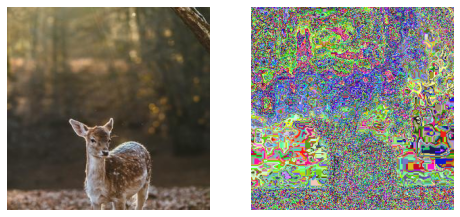

In [ ]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.LUT(img1, lut)
imshow(img1, img2, figsize=8)

### Gamma Correction

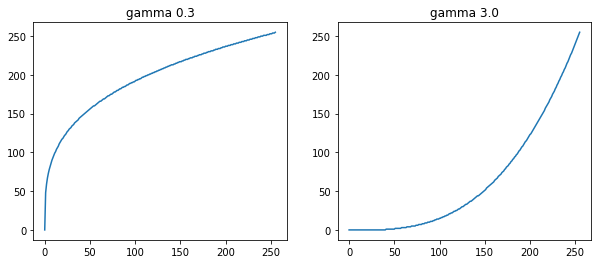

In [ ]:
def get_gamma_lut(gamma):
    lut = np.arange(0, 256) ** gamma
    lut = ((lut - lut.min()) / (lut.max() - lut.min())) * 255
    lut = lut.astype('uint8')
    return lut

lut1 = get_gamma_lut(0.3)
lut2 = get_gamma_lut(3)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 256), lut1)
plt.title('gamma 0.3')

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 256), lut2)
plt.title('gamma 3.0')

plt.show()

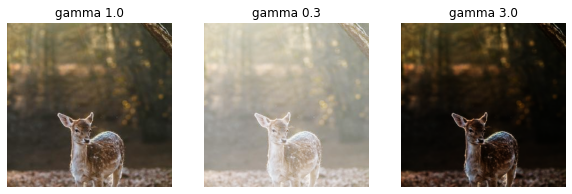

In [ ]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.LUT(img1, get_gamma_lut(0.3))
img3 = cv2.LUT(img1, get_gamma_lut(2))
imshow(img1, img2, img3, title=['gamma 1.0', 'gamma 0.3', 'gamma 3.0'])

# TODO: better image

### Piecewise-linear

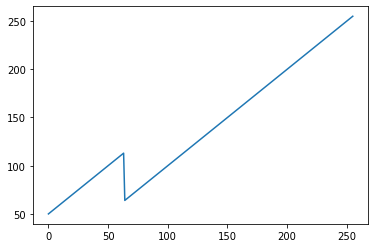

In [ ]:
lut = np.arange(0, 256, dtype='float32')
lut[:64] += 50
lut = lut.astype('uint8')
plt.plot(np.arange(0, 256), lut)
plt.show()

# TODO: better mapping

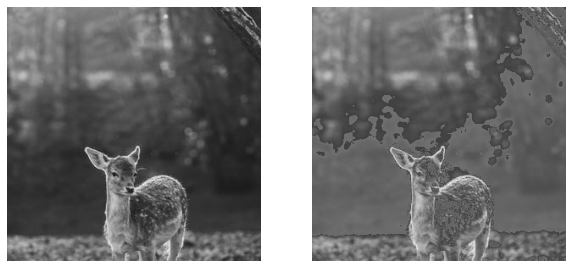

In [ ]:
img1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.LUT(img1, lut)
imshow(img1, img2)

### Bit Planes

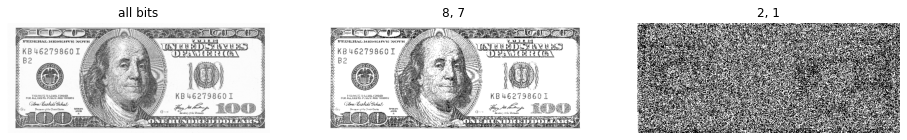

In [ ]:
def get_bit_planes(image, bit_planes):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i][j] = image[i][j] & bit_planes
    image = (((image - image.min()) / (image.max() - image.min())) * 255.0).astype('uint8')
    return image

img1 = cv2.imread('dollar.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (int(img1.shape[1]/10), int(img1.shape[0]/10)))
img2 = get_bit_planes(img1.copy(), 0b11000000)
img3 = get_bit_planes(img1.copy(), 0b00000001)

titles = ['all bits', '8, 7', '2, 1']
imshow(img1, img2, img3, figsize=16, title=titles)

### Image Histogram

In [ ]:
img = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
imshow(img, figsize=6)

hist, _ = np.histogram(img, 256, (0, 255))
plt.plot(list(range(20)), hist)
plt.show()

NameError: ignored

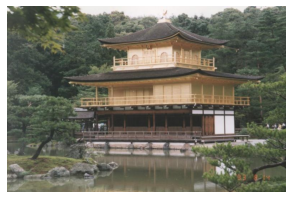

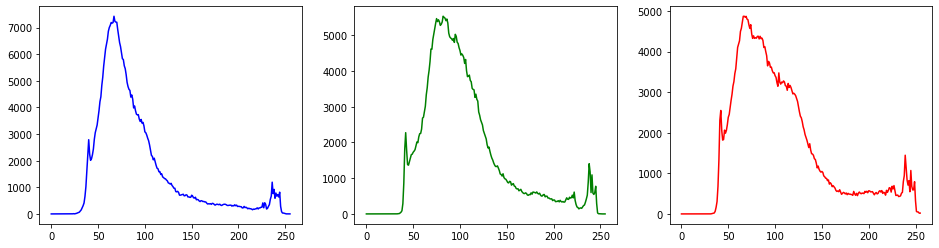

In [ ]:
img = cv2.imread('img2.jpg')
imshow(img, figsize=5)

plt.figure(figsize=(16, 4))

hist_b, _ = np.histogram(img[:,:,0], 256, (0, 255))
plt.subplot(1, 3, 1)
plt.plot(list(range(256)), hist_b, color='blue')

hist_g, _ = np.histogram(img[:,:,1], 256, (0, 255))
plt.subplot(1, 3, 2)
plt.plot(list(range(256)), hist_g, color='green')

hist_r, _ = np.histogram(img[:,:,2], 256, (0, 255))
plt.subplot(1, 3, 3)
plt.plot(list(range(256)), hist_r, color='red')

plt.show()

### PDF (Probability Density Function) and CDF (Cumulative Distribution Function)

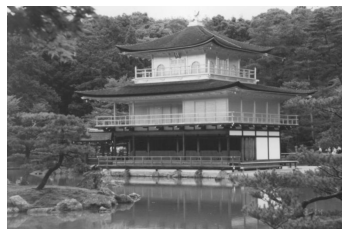

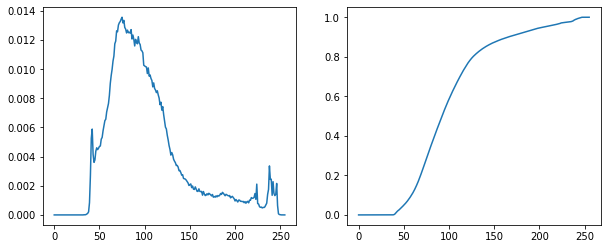

In [ ]:
img = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
imshow(img, figsize=6)

plt.figure(figsize=(10, 4))

hist, _ = np.histogram(img, 256, (0, 255))
pdf = hist.astype('float32') / (img.shape[0] * img.shape[1])
plt.subplot(1, 2, 1)
plt.plot(list(range(256)), pdf)

cdf = np.zeros_like(pdf)
for i in range(len(pdf)):
    cdf[i] = pdf[:i+1].sum()
plt.subplot(1, 2, 2)
plt.plot(list(range(256)), cdf)

plt.show()

### Histogram Equalization

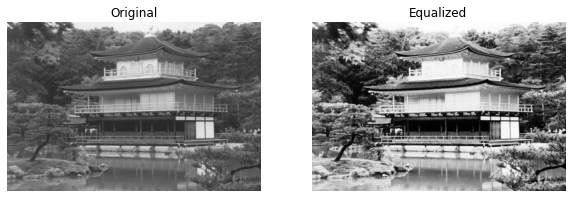

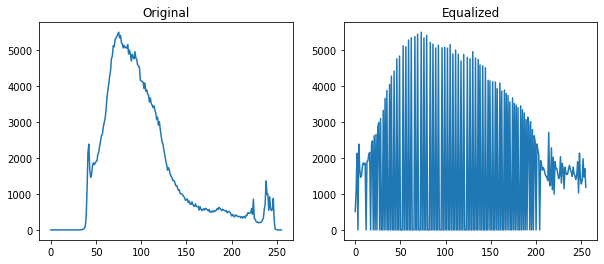

In [ ]:
img = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
imshow(img, equ, title=['Original', 'Equalized'])

# Plot histograms
plt.figure(figsize=(10, 4))

hist1, _ = np.histogram(img, 256, (0, 255))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.plot(list(range(256)), hist1)

hist2, _ = np.histogram(equ, 256, (0, 255))
plt.subplot(1, 2, 2)
plt.title('Equalized')
plt.plot(list(range(256)), hist2)

plt.show()

# TODO: implement

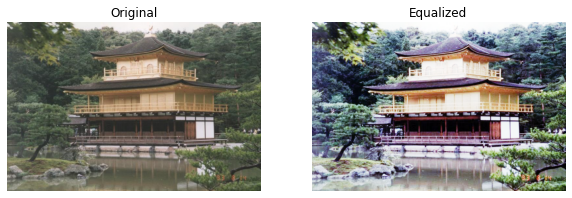

In [ ]:
img = cv2.imread('img2.jpg')
equ = img.copy()
equ[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
equ[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
equ[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
imshow(img, equ, title=['Original', 'Equalized'])

# TODO: use same mappings

### Hisstogram Matching

In [ ]:
arr = np.array([1, 1, 2, 3, 3, 3, 1, 5])
s_values, bin_idx, s_counts = np.unique(arr, return_inverse=True, return_counts=True)
print('Unique Values:', s_values)
print('Bin Mapping:', bin_idx)
print('Counts', s_counts)

csum = np.cumsum(s_counts)
print('Commulative Sum of Counts:', csum)

Unique Values: [1 2 3 5]
Bin Mapping: [0 0 1 2 2 2 0 3]
Counts [3 1 3 1]
Commulative Sum of Counts: [3 4 7 8]


In [ ]:
def hist_match(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    interp_t_values = interp_t_values[bin_idx].reshape(oldshape)
    img = interp_t_values.astype('uint8')
    return img


# TODO: implement better
# TODO: explain implementation

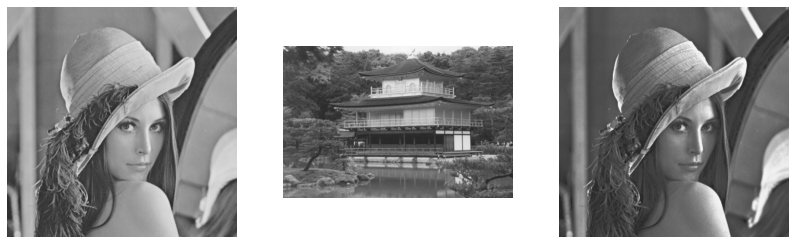

In [ ]:
img1 = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
output = hist_match(img1, img2)

imshow(img1, img2, output, figsize=14)

# TODO: plot histograms

# Region Processing

### Box Filter

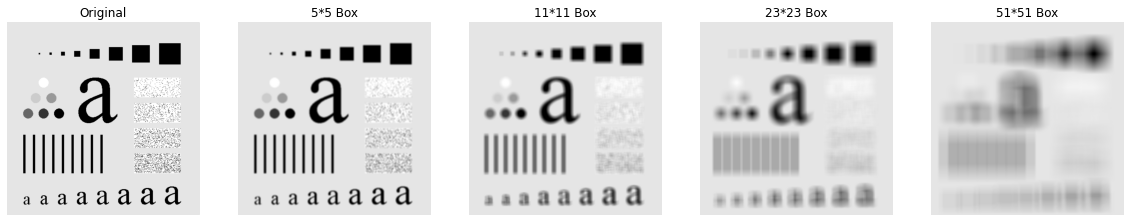

In [ ]:
img = cv2.imread('img1.tif', cv2.IMREAD_GRAYSCALE)

images = [img]
titles = ['Original']
for k in [5, 11, 23, 51]:
    kernel = np.ones((k,k), dtype='uint8') / (k*k)
    out = cv2.filter2D(img, -1, kernel)
    images.append(out)
    titles.append(f'{k}*{k} Box')

imshow(images, title=titles, figsize=20)

### Gaussian Filter

In [ ]:
def get_gaussian_kernel(k, sigma=-1):
    kernel = cv2.getGaussianKernel(k, sigma)
    kernel /= kernel[0,0]
    kernel = kernel @ kernel.T
    kernel /= kernel.sum()
    return kernel

def normalize(img):
    img = ((img - img.min()) / (img.max() - img.min())) * 255
    return np.round(img).astype('uint8')

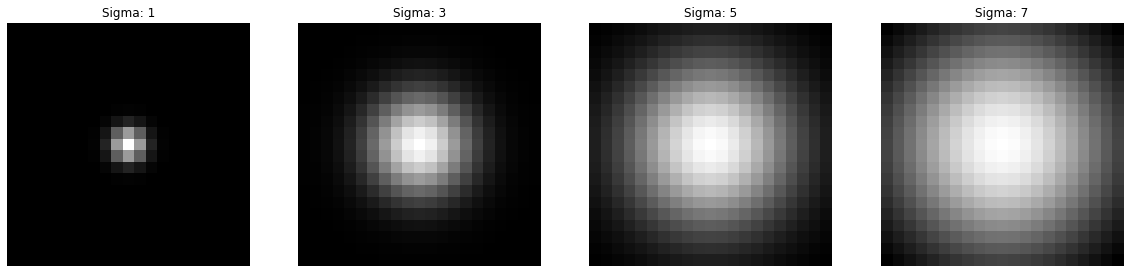

In [ ]:
images = []
titles = []

for sigma in [1, 3, 5, 7]:
    images.append(normalize(get_gaussian_kernel(21, sigma)))
    titles.append(f'Sigma: {sigma}')

imshow(images, title=titles, figsize=20)

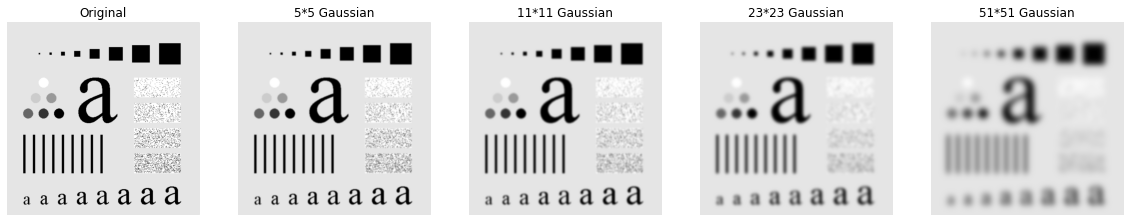

In [ ]:
img = cv2.imread('img1.tif', cv2.IMREAD_GRAYSCALE)

images = [img]
titles = ['Original']
for k in [5, 11, 23, 51]:
    kernel = get_gaussian_kernel(k)
    out = cv2.filter2D(img, -1, kernel)
    images.append(out)
    titles.append(f'{k}*{k} Gaussian')

imshow(images, title=titles, figsize=20)

### Bilatral Filter

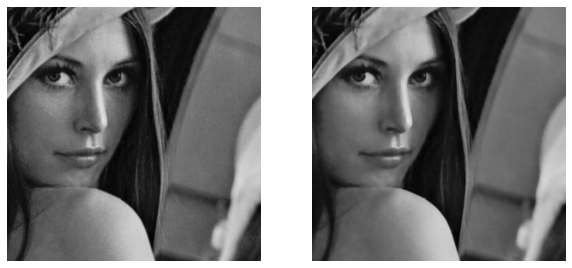

In [ ]:
img = cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)
out = cv2.bilateralFilter(img, 5, sigmaColor=15, sigmaSpace=15)
imshow(img, out)

### Median Filter

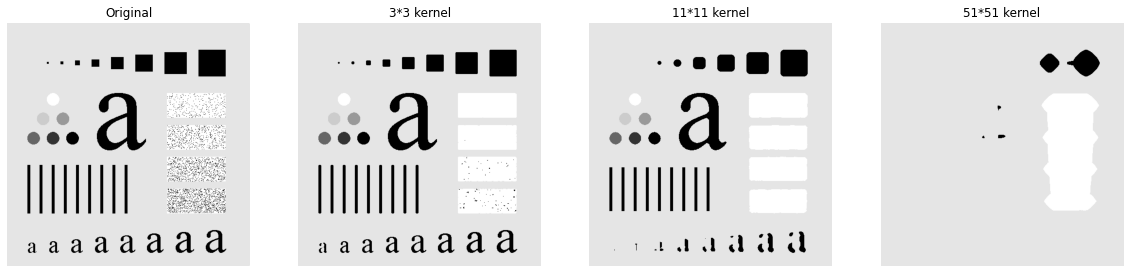

In [ ]:
img = cv2.imread('img1.tif', cv2.IMREAD_GRAYSCALE)

images = [img]
titles = ['Original']
for kernel in [3, 11, 51]:
    img2 = cv2.medianBlur(img, kernel)
    images.append(img2)
    titles.append(f'{kernel}*{kernel} kernel')

imshow(images, title=titles, figsize=20)

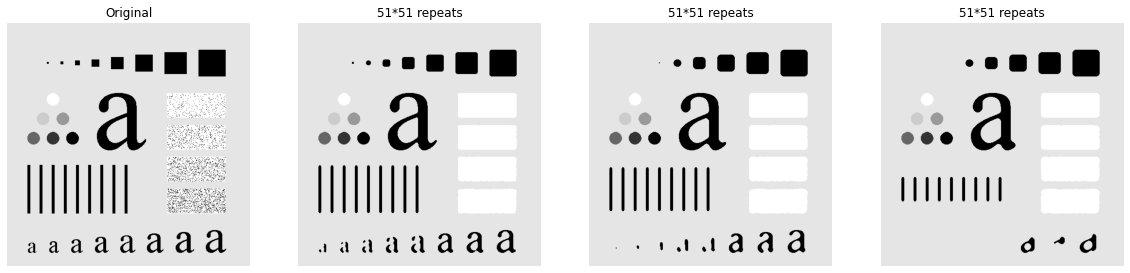

In [ ]:
img = cv2.imread('img1.tif', cv2.IMREAD_GRAYSCALE)

images = [img]
titles = ['Original']
for repeat in [2, 10, 50]:
    img2 = img.copy()
    for _ in range(repeat):
        img2 = cv2.medianBlur(img2, 5)
    images.append(img2)
    titles.append(f'{kernel}*{kernel} repeats')

imshow(images, title=titles, figsize=20)

### Min Filter

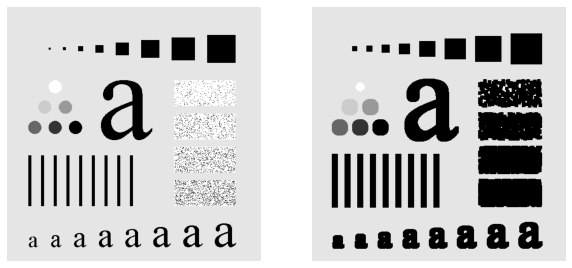

In [ ]:
img = cv2.imread('img1.tif', cv2.IMREAD_GRAYSCALE)
out = img.copy()

k = 7
s = k // 2
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        area = img[ max(i-s, 0):min(i+s+1,img.shape[0]) , max(j-s,0):min(j+s+1, img.shape[1]) ]
        out[i, j] = area.min()

imshow(img, out)


### Laplacian Filter

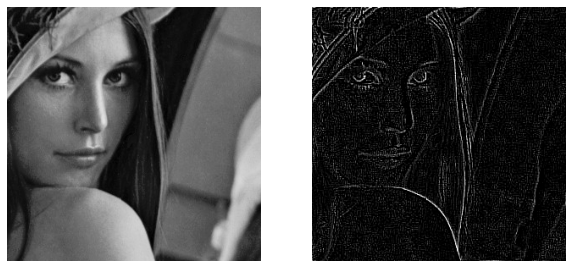

In [ ]:
img = cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)
edges = cv2.Laplacian(img, -1, ksize=3)
imshow(img, edges, figsize=10)

### High-boost Filtering

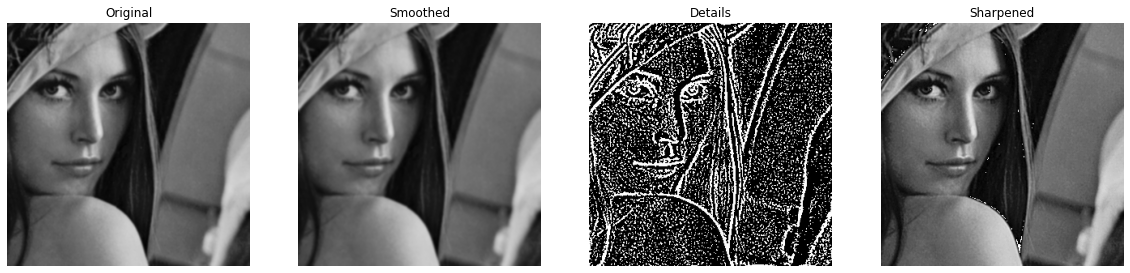

In [ ]:
img = cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)
img = cv2.filter2D(img, -1, get_gaussian_kernel(3))

smoothed = cv2.filter2D(img, -1, get_gaussian_kernel(3))
details = img - smoothed
k = 3
sharpened = img + k*details

titles = ['Original', 'Smoothed', 'Details', 'Sharpened']
imshow(img, smoothed, details, sharpened, title=titles, figsize=20)

### Sobel Edge Detector

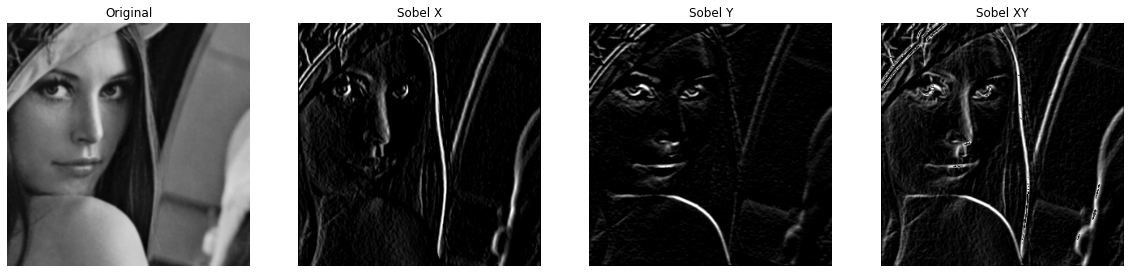

In [ ]:
img = cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)
img = cv2.filter2D(img, -1, get_gaussian_kernel(3))

sobelx  = cv2.Sobel(img, -1, dx=1, dy=0, ksize=3)
sobely  = cv2.Sobel(img, -1, dx=0, dy=1, ksize=3)
sobelxy = sobelx + sobely

titles = ['Original', 'Sobel X', 'Sobel Y', 'Sobel XY']
imshow(img, sobelx, sobely, sobelxy, title=titles, figsize=20)

### Add Paddings


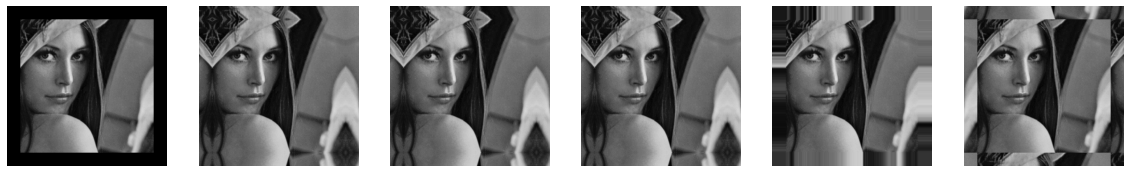

In [ ]:
img = cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)

images = []
modes = [
    cv2.BORDER_CONSTANT,
    cv2.BORDER_REFLECT,
    cv2.BORDER_REFLECT_101,
    cv2.BORDER_DEFAULT,
    cv2.BORDER_REPLICATE,
    cv2.BORDER_WRAP
]
for mode in modes:
    s = 30
    out = cv2.copyMakeBorder(img, top=s, bottom=s, left=s, right=s, borderType=mode)
    images.append(out)

imshow(images, figsize=20)